<a href="https://colab.research.google.com/github/kiva-mccr/Linear-Circuits-2-Calculator/blob/main/Linear-Circuits-2-Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Use at your own risk!

In [ ]:
#@title Inverse Laplace Calculator

import sympy as sym
from sympy.abc import s, t
import IPython.display as disp
from google.colab import runtime

## Functions
def inverse_laplace():
  print("\033[1mInsert a Laplace function in terms of 's': \033[0m")
  function_text = input()
  if function_text == "":
    return "exit"
  function_text = function_text.lower()
  function_text = function_text.replace(')(', ') * (')
  function = sym.sympify(function_text)
  symfy_function = sym.sympify(function)
  symfy_function_display = sym.N(symfy_function, 2)

  print("\n\033[1mYour Input:\033[0m")
  disp.display_latex(symfy_function_display)

  # Perform partial fraction decomposition
  partial_fraction = sym.apart(symfy_function, s)  # Added this line

  # Perform inverse Laplace transform
  invlap_function = sym.inverse_laplace_transform(partial_fraction, s, t)
  invlap_function = invlap_function.subs(sym.Heaviside(t), 'u(t)')

  # Replace hyperbolic trigonometric functions with their exponential equivalents
  invlap_function = invlap_function.rewrite(sym.sinh, sym.exp).rewrite(sym.cosh, sym.exp)

  # Simplify the expression while avoiding hyperbolic trigonometric functions
  invlap_function = sym.simplify(invlap_function)

  # Expand the expression to distribute out terms
  invlap_function = sym.expand(invlap_function)
  ans = invlap_function
  # Format output with digits rounded to two decimal places and display exponent
  invlap_function = sym.N(invlap_function, 2)
  print("\n\033[1mYour Output:\033[0m")  # This line will make the output bold
  disp.display_latex(invlap_function)
  print("\n\n\n")
  return invlap_function

## UI
print("All entries must adhere to programming mathematical convention, ex. 5*s' not '5s'. Press enter to exit.\n\n")
inv_lap_ans = ""
while True:
  if inv_lap_ans == "exit":
    print("\nEnd of runtime...")
    break
  inv_lap_ans = inverse_laplace()

All entries must adhere to programming mathematical convention, ex. 5*s' not '5s'. Press enter to exit.


Insert a Laplace function in terms of 's': 
(5*s^4+2*s^2)/(s^2+64)

Your Input:



Your Output:






Insert a Laplace function in terms of 's': 


End of runtime...




---



In [ ]:
#@title Two-Port Parameter Calculator

import sympy as sym
from sympy.abc import s, t
import IPython.display as disp
from IPython.display import Math
from google.colab import runtime

## Functions
def parameter():
  print("\033[1mWhich set of parameters are you inputting? (z, y, h, g, a, or b)\033[0m")
  function_text = input()
  function_text = function_text.lower()
  if function_text == "":
    return "exit"
  if function_text == "z":
    print("\033[1mWhat is the value of z11?\033[0m")
    z_11 = sym.sympify(input())
    print("\033[1mWhat is the value of z12?\033[0m")
    z_12 = sym.sympify(input())
    print("\033[1mWhat is the value of z21?\033[0m")
    z_21 = sym.sympify(input())
    print("\033[1mWhat is the value of z22?\033[0m")
    z_22 = sym.sympify(input())

    # Calculate delta value
    z_delta = (z_11 * z_22) - (z_12 * z_21)

    # Define and print matricies
    print("\n\033[1mComputed values:\033[0m")
    #z
    z_matrix = [[sym.N(z_11,2), sym.N(z_12,2)], [sym.N(z_21,2), sym.N(z_22,2)]]
    print("z=")
    disp.display(sym.Matrix(z_matrix))
    #y
    y_matrix = [[sym.N(sym.sympify(z_22/z_delta),2), sym.N(sym.sympify(-z_12/z_delta),2)], [sym.N(sym.sympify(-z_21/z_delta),2), sym.N(sym.sympify(z_11/z_delta),2)]]
    print("\ny=")
    disp.display(sym.Matrix(y_matrix))
    #h
    h_matrix = [[sym.N(z_delta/z_22,2), sym.N(z_12/z_22,2)], [sym.N(-z_21/z_22,2), sym.N(1/z_22,2)]]
    print("\nh=")
    disp.display(sym.Matrix(h_matrix))
    #g
    g_matrix = [[sym.N(1/z_11,2), sym.N(-z_12/z_11,2)], [sym.N(z_21/z_11,2), sym.N(z_delta/z_11,2)]]
    print("\ng=")
    disp.display(sym.Matrix(g_matrix))
    #a
    a_matrix = [[sym.N(z_11/z_21,2), sym.N(z_delta/z_21,2)], [sym.N(1/z_21,2), sym.N(z_22/z_21,2)]]
    print("\na=")
    disp.display(sym.Matrix(a_matrix))
    #b
    b_matrix = [[sym.N(z_22/z_12,2), sym.N(z_delta/z_12,2)], [sym.N(1/z_12,2), sym.N(z_11/z_12,2)]]
    print("\nb=")
    disp.display(sym.Matrix(b_matrix))
  if function_text == "y":
    print("\033[1mWhat is the value of y11?\033[0m")
    y_11 = sym.sympify(input())
    print("\033[1mWhat is the value of y12?\033[0m")
    y_12 = sym.sympify(input())
    print("\033[1mWhat is the value of y21?\033[0m")
    y_21 = sym.sympify(input())
    print("\033[1mWhat is the value of y22?\033[0m")
    y_22 = sym.sympify(input())

    # Calculate delta value
    y_delta = (y_11 * y_22) - (y_12 * y_21)

    # Define and print matricies
    print("\n\033[1mComputed values:\033[0m")
    #z
    z_matrix = [[sym.N(y_22/y_delta,2), sym.N(-y_12/y_delta,2)], [sym.N(-y_21/y_delta,2), sym.N(y_11/y_delta,2)]]
    print("z=")
    disp.display(sym.Matrix(z_matrix))
    #y
    y_matrix = [[sym.N(sym.sympify(y_11),2), sym.N(sym.sympify(y_12),2)], [sym.N(sym.sympify(y_21),2), sym.N(sym.sympify(y_22),2)]]
    print("\ny=")
    disp.display(sym.Matrix(y_matrix))
    #h
    h_matrix = [[sym.N(1/y_11,2), sym.N(-y_12/y_11,2)], [sym.N(y_21/y_11,2), sym.N(y_delta/y_11,2)]]
    print("\nh=")
    disp.display(sym.Matrix(h_matrix))
    #g
    g_matrix = [[sym.N(y_delta/y_22,2), sym.N(y_12/y_22,2)], [sym.N(-y_21/y_22,2), sym.N(1/y_22,2)]]
    print("\ng=")
    disp.display(sym.Matrix(g_matrix))
    #a
    a_matrix = [[sym.N(-y_22/y_21,2), sym.N(-1/y_21,2)], [sym.N(-y_delta/y_21,2), sym.N(-y_11/y_21,2)]]
    print("\na=")
    disp.display(sym.Matrix(a_matrix))
    #b
    b_matrix = [[sym.N(-y_11/y_12,2), sym.N(-1/y_12,2)], [sym.N(-y_delta/y_12,2), sym.N(y_22/y_12,2)]]
    print("\nb=")
    disp.display(sym.Matrix(b_matrix))
  if function_text == "h":
    print("\033[1mWhat is the value of h11?\033[0m")
    h_11 = sym.sympify(input())
    print("\033[1mWhat is the value of h12?\033[0m")
    h_12 = sym.sympify(input())
    print("\033[1mWhat is the value of h21?\033[0m")
    h_21 = sym.sympify(input())
    print("\033[1mWhat is the value of h22?\033[0m")
    h_22 = sym.sympify(input())

    # Calculate delta value
    h_delta = (h_11 * h_22) - (h_12 * h_21)

    # Define and print matricies
    print("\n\033[1mComputed values:\033[0m")
    #z
    z_matrix = [[sym.N(h_delta/h_22,2), sym.N(h_12/h_22,2)], [sym.N(-h_21/h_22,2), sym.N(1/h_22,2)]]
    print("z=")
    disp.display(sym.Matrix(z_matrix))
    #y
    y_matrix = [[sym.N(1/h_11,2), sym.N(-h_12/h_11,2)], [sym.N(h_21/h_11,2), sym.N(h_delta/h_11,2)]]
    print("\ny=")
    disp.display(sym.Matrix(y_matrix))
    #h
    h_matrix = [[sym.N(h_11,2), sym.N(h_12,2)], [sym.N(h_21,2), sym.N(h_22,2)]]
    print("\nh=")
    disp.display(sym.Matrix(h_matrix))
    #g
    g_matrix = [[sym.N(h_22/h_delta,2), sym.N(-h_12/h_delta,2)], [sym.N(-h_21/h_delta,2), sym.N(h_11/h_delta,2)]]
    print("\ng=")
    disp.display(sym.Matrix(g_matrix))
    #a
    a_matrix = [[sym.N(-h_delta/h_21,2), sym.N(-h_11/h_21,2)], [sym.N(-h_22/h_21,2), sym.N(-1/h_21,2)]]
    print("\na=")
    disp.display(sym.Matrix(a_matrix))
    #b
    b_matrix = [[sym.N(1/h_12,2), sym.N(h_11/h_12,2)], [sym.N(h_22/h_12,2), sym.N(h_delta/h_12,2)]]
    print("\nb=")
    disp.display(sym.Matrix(b_matrix))
  if function_text == "g":
    print("\033[1mWhat is the value of g11?\033[0m")
    g_11 = sym.sympify(input())
    print("\033[1mWhat is the value of g12?\033[0m")
    g_12 = sym.sympify(input())
    print("\033[1mWhat is the value of g21?\033[0m")
    g_21 = sym.sympify(input())
    print("\033[1mWhat is the value of g22?\033[0m")
    g_22 = sym.sympify(input())

    # Calculate delta value
    g_delta = (g_11 * g_22) - (g_12 * g_21)

    # Define and print matricies
    print("\n\033[1mComputed values:\033[0m")
    #z
    z_matrix = [[sym.N(1/g_11,2), sym.N(-g_12/g_11,2)], [sym.N(g_21/g_11,2), sym.N(g_delta/g_11,2)]]
    print("z=")
    disp.display(sym.Matrix(z_matrix))
    #y
    y_matrix = [[sym.N(g_delta/g_22,2), sym.N(g_12/g_22,2)], [sym.N(-g_21/g_22,2), sym.N(1/g_22,2)]]
    print("\ny=")
    disp.display(sym.Matrix(y_matrix))
    #h
    h_matrix = [[sym.N(g_22/g_delta,2), sym.N(g_12/g_delta,2)], [sym.N(g_21/g_delta,2), sym.N(g_11/g_delta,2)]]
    print("\nh=")
    disp.display(sym.Matrix(h_matrix))
    #g
    g_matrix = [[sym.N(g_11,2), sym.N(g_12,2)], [sym.N(g_21,2), sym.N(g_22,2)]]
    print("\ng=")
    disp.display(sym.Matrix(g_matrix))
    #a
    a_matrix = [[sym.N(1/g_21,2), sym.N(g_22/g_21,2)], [sym.N(g_11/g_21,2), sym.N(g_delta/g_21,2)]]
    print("\na=")
    disp.display(sym.Matrix(a_matrix))
    #b
    b_matrix = [[sym.N(-g_delta/g_12,2), sym.N(-g_22/g_12,2)], [sym.N(-g_11/g_12,2), sym.N(-1/g_12,2)]]
    print("\nb=")
    disp.display(sym.Matrix(b_matrix))
  if function_text == "a":
    print("\033[1mWhat is the value of a11?\033[0m")
    a_11 = sym.sympify(input())
    print("\033[1mWhat is the value of a12?\033[0m")
    a_12 = sym.sympify(input())
    print("\033[1mWhat is the value of a21?\033[0m")
    a_21 = sym.sympify(input())
    print("\033[1mWhat is the value of a22?\033[0m")
    a_22 = sym.sympify(input())

    # Calculate delta value
    a_delta = (a_11 * a_22) - (a_12 * a_21)

    # Define and print matricies
    print("\n\033[1mComputed values:\033[0m")
    #z
    z_matrix = [[sym.N(a_11/a_21,2), sym.N(a_delta/a_21,2)], [sym.N(1/a_21,2), sym.N(a_22/a_21,2)]]
    print("z=")
    disp.display(sym.Matrix(z_matrix))
    #y
    y_matrix = [[sym.N(a_22/a_12,2), sym.N(-a_delta/a_12,2)], [sym.N(-1/a_12,2), sym.N(a_11/a_12,2)]]
    print("\ny=")
    disp.display(sym.Matrix(y_matrix))
    #h
    h_matrix = [[sym.N(a_12/a_22,2), sym.N(a_delta/a_22,2)], [sym.N(-1/a_22,2), sym.N(a_21/a_22,2)]]
    print("\nh=")
    disp.display(sym.Matrix(h_matrix))
    #g
    g_matrix = [[sym.N(a_21/a_11,2), sym.N(-a_delta/a_11,2)], [sym.N(1/a_11,2), sym.N(a_12/a_11,2)]]
    print("\ng=")
    disp.display(sym.Matrix(g_matrix))
    #a
    a_matrix = [[sym.N(a_11,2), sym.N(a_12,2)], [sym.N(a_21,2), sym.N(a_22,2)]]
    print("\na=")
    disp.display(sym.Matrix(a_matrix))
    #b
    b_matrix = [[sym.N(a_22/a_delta,2), sym.N(a_12/a_delta,2)], [sym.N(a_21/a_delta,2), sym.N(a_11/a_delta,2)]]
    print("\nb=")
    disp.display(sym.Matrix(b_matrix))
  if function_text == "b":
    print("\033[1mWhat is the value of b11?\033[0m")
    b_11 = sym.sympify(input())
    print("\033[1mWhat is the value of b12?\033[0m")
    b_12 = sym.sympify(input())
    print("\033[1mWhat is the value of b21?\033[0m")
    b_21 = sym.sympify(input())
    print("\033[1mWhat is the value of b22?\033[0m")
    b_22 = sym.sympify(input())

    # Calculate delta value
    b_delta = (b_11 * b_22) - (b_12 * b_21)

    # Define and print matricies
    print("\n\033[1mComputed values:\033[0m")
    #z
    z_matrix = [[sym.N(b_22/b_21,2), sym.N(1/b_21,2)], [sym.N(b_delta/b_21,2), sym.N(b_11/b_21,2)]]
    print("z=")
    disp.display(sym.Matrix(z_matrix))
    #y
    y_matrix = [[sym.N(b_11/b_12,2), sym.N(-1/b_12,2)], [sym.N(-b_delta/b_12,2), sym.N(b_22/b_12,2)]]
    print("\ny=")
    disp.display(sym.Matrix(y_matrix))
    #h
    h_matrix = [[sym.N(b_12/b_11,2), sym.N(1/b_11,2)], [sym.N(-b_delta/b_11,2), sym.N(b_21/b_11,2)]]
    print("\nh=")
    disp.display(sym.Matrix(h_matrix))
    #g
    g_matrix = [[sym.N(b_21/b_22,2), sym.N(-1/b_22,2)], [sym.N(b_delta/b_22,2), sym.N(b_12/b_22,2)]]
    print("\ng=")
    disp.display(sym.Matrix(g_matrix))
    #a
    a_matrix = [[sym.N(b_22/b_delta,2), sym.N(b_12/b_delta,2)], [sym.N(b_21/b_delta,2), sym.N(b_11/b_delta,2)]]
    print("\na=")
    disp.display(sym.Matrix(a_matrix))
    #b
    b_matrix = [[sym.N(b_11,2), sym.N(b_12,2)], [sym.N(b_21,2), sym.N(b_22,2)]]
    print("\nb=")
    disp.display(sym.Matrix(b_matrix))

  print("\n\n\n")
  return parameter

## UI
print("All entries must adhere to programming mathematical convention, ex. 5*s' not '5s'. Press enter to exit.\n\n")
parameter_ans = ""
while True:
  if parameter_ans == "exit":
    print("\nEnd of runtime...")
    break
  parameter_ans = parameter()

All entries must adhere to programming mathematical convention, ex. 5*s' not '5s'. Press enter to exit.


Which set of parameters are you inputting? (z, y, h, g, a, or b)
h
What is the value of h11?
4
What is the value of h12?
300
What is the value of h21?
91/2
What is the value of h22?
10000

Computed values:
z=


Matrix([
[    2.6,   0.03],
[-0.0045, 0.0001]])


y=


Matrix([
[0.25,  -75.0],
[11.0, 6.6e+3]])


h=


Matrix([
[ 4.0, 3.0e+2],
[46.0, 1.0e+4]])


g=


Matrix([
[   0.38,  -0.011],
[-0.0017, 0.00015]])


a=


Matrix([
[-5.8e+2, -0.088],
[-2.2e+2, -0.022]])


b=


Matrix([
[0.0033, 0.013],
[  33.0,  88.0]])





Which set of parameters are you inputting? (z, y, h, g, a, or b)


End of runtime...




---



In [ ]:
#@title Two Port Circuit Calculator
print(">> In Progress <<")
import sympy as sym
from sympy.abc import s, t
import IPython.display as disp
from IPython.display import Math
from google.colab import runtime
import ipywidgets as widgets
from IPython.display import display

def circuit():
  widgets.IntSlider()

circuit()

## UI
#print("All entries must adhere to programming mathematical convention, ex. 5*s' not '5s'. Press enter to exit.\n\n")
#circuit_ans = ""
#while True:
#  if circuit_ans == "exit":
#    print("\nEnd of runtime...")
#    break
#circuit_ans = circuit()

>> In Progress <<


In [ ]:
#@title System of Equations Calculator

print(">> In Progress <<")
import sympy as sym
sym.init_printing()
x,y,z = sym.symbols('x,y,z')
c1 = sym.Symbol('c1')
f = sym.Eq(2*x**2+y+z,1)
g = sym.Eq(x+2*y+z,c1)
h = sym.Eq(-2*x+y,-z)

sym.solve([f,g,h],(x,y,z))

def system():
  eqn_array = []
  var_array = []
  while True:
    print("\033[1mInput an equation from the system, ex. 'x+1=0'.\033[0m")
    eqn_input = input()
    eqn_input = eqn_input.lower()
    if eqn_input == "":
      break
    else:
      eqn_array.append(eqn_input)
  while True:
    print("\033[1mInput a variable from the system, ex. 'x'.\033[0m")
    var_input = input()
    var_input = var_input.lower()
    if var_input == "":
      break
    else:
      var_array.append(var_input)
  print(eqn_array)
  print(var_array)
  return ""


## UI
print("All entries must adhere to programming mathematical convention, ex. '5*s' not '5s'.\n Keep in mind all inputs will be turned to lowercase. Press enter to exit.\n\n")
system_ans = ""
while True:
  if system_ans == "exit":
    print("\nEnd of runtime...")
    break
  system_ans = system()


# Steps <3
# Query user for equations, symbols to solve for, and symbols to not (constants).
# Use a while True loop for query, and break from loop upon empty entry.
# Use a regex expression to separate either side of the '=' into separate pieces of an array.
# Pass those to a sym.Eq function, define said functions.
# Pass functions and symbols to solve for to the sym.solve.
# Pray it works
# Phrase the above solving and definition of eq as a try.
# That way mutliple attempts can be made using different methods
# Return error messages explaining the input issue, ex. not enough equations for number of solving symbols.
# Repeat? In the case of the repeat break, a blank input should only break in the initial call.
# Solutions should always print in LaTeX format, preferably regular expression form (non-matrix)
# Repeat with fsolve? and other approximation techniques???

# https://reliability.readthedocs.io/en/latest/Solving%20simultaneous%20equations%20with%20sympy.html

>> In Progress <<
All entries must adhere to programming mathematical convention, ex. '5*s' not '5s'.
 Keep in mind all inputs will be turned to lowercase. Press enter to exit.


Input an equation from the system, ex. 'x+1=0'.
x+1
Input an equation from the system, ex. 'x+1=0'.

Input a variable from the system, ex. 'x'.
x
Input a variable from the system, ex. 'x'.

['x+1']
['x']
Input an equation from the system, ex. 'x+1=0'.


KeyboardInterrupt: Interrupted by user



---



Please keep in mind that cutoff frequency calculations are approximations only!

All entries must adhere to programming mathematical convention, ex. 5*s' not '5s'. Press enter to exit.


Insert the filter's transfer function in terms of 's': 
s/(s+1000)

Your Input:





What is the lower bound of the frequency domain your searching? (rad/s) 
0

What is the upper bound of the frequency domain your searching? (rad/s) 
1000000


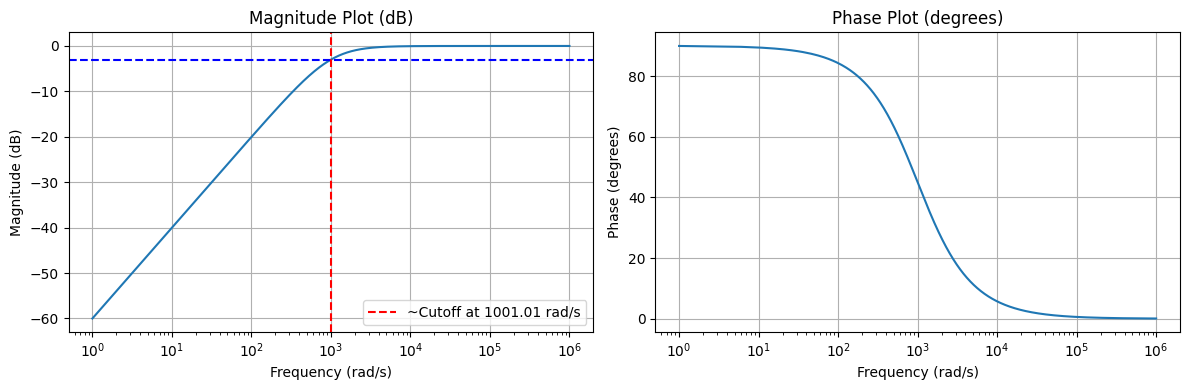





Insert the filter's transfer function in terms of 's': 


End of runtime...


In [ ]:
#@title Filter Characterization Graph

import numpy as np
import sympy as sym
import cmath
import IPython.display as disp
from google.colab import runtime
import matplotlib.pyplot as plt

s = sym.symbols('s')
t = sym.symbols('t')
w = sym.symbols('w')

## Functions
def filter_char():
    print("\033[1mInsert the filter's transfer function in terms of 's': \033[0m")
    function_text = input()

    if function_text == "":
        return "exit"

    display_function = sym.sympify(function_text)
    print("\n\033[1mYour Input:\033[0m")
    disp.display_latex(display_function)
    print("\n")

    symfy_function = sym.sympify(function_text.lower()).subs('s', '1j*w')

    # Convert to complex numbers
    transfer_function = sym.lambdify('w', symfy_function, modules=['numpy'])

    # Symbolic expressions for magnitude and phase
    w = sym.symbols('w')
    magnitude_sym = sym.Abs(symfy_function)
    phase_sym = sym.arg(symfy_function)

    print("\n\033[1mWhat is the lower bound of the frequency domain your searching? (rad/s) \033[0m")
    lower_lim = float(input())
    if lower_lim == "":
        return "exit"
    elif lower_lim <= 0:
      lower_lim = 1
    print("\n\033[1mWhat is the upper bound of the frequency domain your searching? (rad/s) \033[0m")
    upper_lim = float(input())
    if upper_lim == "":
        return "exit"

    # Generate frequency values
    frequencies = np.linspace(lower_lim, upper_lim, int((upper_lim-lower_lim)/5))

    # Calculate magnitude and phase values
    magnitude_values = 20 * np.log10(np.abs(transfer_function(frequencies)))
    phase_values = np.angle(transfer_function(frequencies), deg=True)

    # Plot magnitude and phase
    plt.figure(figsize=(12, 4))

    # Magnitude plot
    plt.subplot(1, 2, 1)
    plt.semilogx(frequencies, magnitude_values)
    plt.title('Magnitude Plot (dB)')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.axhline(y=-3, color='blue', linestyle='--')

    # Find the indices where the magnitude crosses -3 dB
    indices = np.where(np.diff(np.sign(magnitude_values + 3)))[0]

    # Store intersection frequencies
    intersection_frequencies = [frequencies[index] for index in indices]

    # Add vertical lines at all intersection frequencies and label the legend
    for index, frequency in zip(indices, intersection_frequencies):
        plt.axvline(x=frequencies[index], color='red', linestyle='--', label=f'~Cutoff at {frequency:.2f} rad/s')

    plt.legend()

    # Phase plot
    plt.subplot(1, 2, 2)
    plt.semilogx(frequencies, phase_values)
    plt.title('Phase Plot (degrees)')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (degrees)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    print("\n\n\n")

    return filter_char

## UI
print("Please keep in mind that cutoff frequency calculations are approximations only!\n")
print("All entries must adhere to programming mathematical convention, ex. 5*s' not '5s'. Press enter to exit.\n\n")
filter_char_ans = ""
while True:
  if filter_char_ans == "exit":
    print("\nEnd of runtime...")
    break
  filter_char_ans = filter_char()

*Made by Kiva M. ♡*